## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read the dataset
file_path = "C:/Users/yasha/OneDrive/Desktop/Yashaswini/Stats & ML/Lead Scoring Assignment/Lead Scoring Assignment/leads.csv"

# Read the CSV file into a DataFrame
leads = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
leads.shape

(9240, 37)

In [10]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning and Preprocessing

1. Handle missing values.
2. Encode categorical variables.
3. Split the data into predictor variables (X) and target variable (y).
4. Split the data into training and testing sets.

In [12]:
# Handling missing values by filling them with the mode for categorical variables and mean for numerical variables
for column in leads.columns:
    if leads[column].dtype == 'object':
        leads[column].fillna(leads[column].mode()[0], inplace=True)
    else:
        leads[column].fillna(leads[column].mean(), inplace=True)

In [13]:
# Dropping unnecessary columns
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [14]:
# Encoding categorical variables
leads = pd.get_dummies(leads, drop_first=True)

In [15]:
# Splitting the data into predictor variables (X) and target variable (y)
X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [16]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Model Building
Using logistic regression to build the model.

In [17]:
from sklearn.linear_model import LogisticRegression

# Initializing the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

In [18]:
# Training the logistic regression model
logreg_model.fit(X_train, y_train)

C:\Users\yasha\anacondanavigator\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Step 4: Model Evaluation

In [19]:
# Making predictions on the test set
y_pred = logreg_model.predict(X_test)

In [20]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9253246753246753
Confusion Matrix:
 [[1054   53]
 [  85  656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1107
           1       0.93      0.89      0.90       741

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848



## Step 5: Feature Importance


In [22]:
# Extracting coefficients
coefficients = logreg_model.coef_[0]

In [23]:
# Creating a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [24]:
# Sorting the DataFrame by absolute coefficient values to identify top contributing variables
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
top_three_variables = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).head(3)

print("Top three variables contributing most towards lead conversion probability:")
print(top_three_variables)

Top three variables contributing most towards lead conversion probability:
                                      Feature  Coefficient  \
133                         Tags_Lost to EINS     6.788466   
125                   Tags_Closed by Horizzon     5.195609   
142  Tags_Will revert after reading the email     3.071934   

     Absolute_Coefficient  
133              6.788466  
125              5.195609  
142              3.071934  


## Step 6: Making Predictions and Visualizing Results

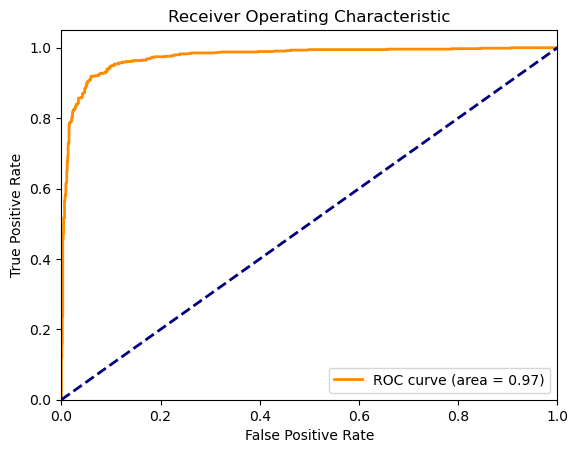

In [27]:
# Making predictions on the test set with probabilities
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Plotting the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()